Huỳnh Thiện Tùng (19522492)

Bài tập Cài đặt Logistic Regression với Tensorflow/Pytorch

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
means = [[2, 5], [6, 8]]
cov = [[1, 0], [0, 1]]

NUMBER_OF_SAMPLE_PER_CLASS = 500
n_sample = NUMBER_OF_SAMPLE_PER_CLASS * 2

positive = np.random.multivariate_normal(means[0], cov, NUMBER_OF_SAMPLE_PER_CLASS)
negative = np.random.multivariate_normal(means[1], cov, NUMBER_OF_SAMPLE_PER_CLASS)

X = np.concatenate((positive, negative), axis = 0).T

original_label = np.asarray([0]*NUMBER_OF_SAMPLE_PER_CLASS + [1]*NUMBER_OF_SAMPLE_PER_CLASS).T

In [3]:
X = np.transpose(X)
Y = original_label
print('Shape X: ', X.shape)
print('Shape Y: ', Y.shape)

Shape X:  (1000, 2)
Shape Y:  (1000,)


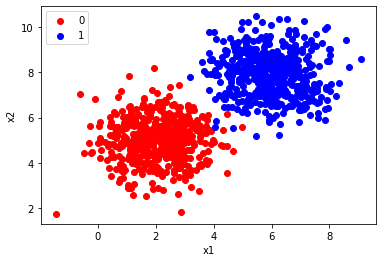

In [4]:
neg_idx = [i for i in range(len(original_label)) if original_label[i] == 0 ]
pos_idx = [i for i in range(len(original_label)) if original_label[i] == 1]

negative = X[neg_idx]
positive = X[pos_idx]

plt.scatter(negative[:,0], negative[:,1], color='red')
plt.scatter(positive[:,0], positive[:,1], color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['0', '1'])
plt.show()

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=X.shape[1], activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics='accuracy')

In [7]:
history = model.fit(X, Y, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 6.6367 - accuracy: 0.6250 - val_loss: 17.4587 - val_accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 6.4881 - accuracy: 0.6250 - val_loss: 17.0908 - val_accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 6.3503 - accuracy: 0.6250 - val_loss: 16.7236 - val_accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 6.2138 - accuracy: 0.6250 - val_loss: 16.3588 - val_accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 6.0772 - accuracy: 0.6250 - val_loss: 15.9982 - val_accuracy: 0.0000e+00
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 5.9442 - accuracy: 0.6250 - val_loss: 15.6437 - val_accuracy: 0.0000e+00
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 5.8085 - accuracy: 0.6250 - val_loss: 15.2769 - val

25/25 [==============================] - 0s 1ms/step - loss: 0.7973 - accuracy: 0.1125 - val_loss: 0.7410 - val_accuracy: 0.3050
Epoch 58/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7835 - accuracy: 0.1225 - val_loss: 0.7106 - val_accuracy: 0.4100
Epoch 59/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7717 - accuracy: 0.1975 - val_loss: 0.7028 - val_accuracy: 0.4650
Epoch 60/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.2350 - val_loss: 0.6890 - val_accuracy: 0.5200
Epoch 61/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7481 - accuracy: 0.3050 - val_loss: 0.6808 - val_accuracy: 0.5550
Epoch 62/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7363 - accuracy: 0.3600 - val_loss: 0.6736 - val_accuracy: 0.5850
Epoch 63/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7248 - accuracy: 0.4000 - val_loss: 0.6643 - val_accuracy: 0.6050
Epoch 64/100
25/25 

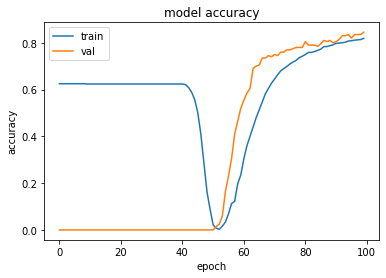

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

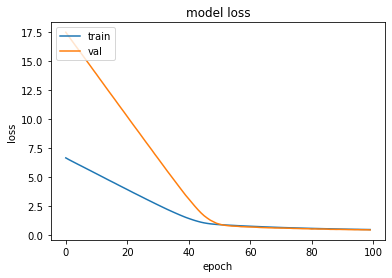

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
class CustomModel(object):
    def __init__(self, model):
        self.model = model
        
    def predict(self, X):
        y_pred = self.model(X)
        return y_pred >= 0.5

<AxesSubplot:>

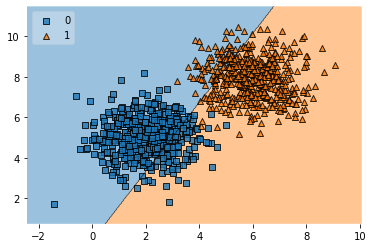

In [12]:
from mlxtend.plotting import plot_decision_regions
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
custom_model = CustomModel(model)
plot_decision_regions(X, Y, clf=custom_model, legend=2)